From 이수안 컴퓨터: http://suanlab.com/youtube/ml.html

# XGBoost (Extreme Gradient Boosting)

* 트리 기반의 앙상블 기법
* 분류에 있어서 다른 알고리즘보다 좋은 예측 성능을 보여줌
* XGBoost는 GBM 기반이지만, GBM의 단점인 느린 수행 시간과 과적합 규제 부재 등의 문제를 해결
* 병렬 학습이 지원되도록 구현되어 병렬 CPU 환경에서 빠르게 학습 가능

In [1]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_boston, load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree

import graphviz
import numpy as np
import matplotlib.pyplot as plt

## 파이썬 기반 XGBoost

In [2]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2, random_state=123)
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [3]:
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
#     'early_stopping': 100
} 
num_rounds = 400

In [4]:
evals = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, 
                      early_stopping_rounds=100, evals=evals)

[0]	train-logloss:0.60944	eval-logloss:0.61010
[1]	train-logloss:0.54047	eval-logloss:0.54074
[2]	train-logloss:0.48211	eval-logloss:0.48490
[3]	train-logloss:0.43365	eval-logloss:0.43922
[4]	train-logloss:0.39072	eval-logloss:0.39791
[5]	train-logloss:0.35372	eval-logloss:0.36211
[6]	train-logloss:0.32222	eval-logloss:0.32996
[7]	train-logloss:0.29292	eval-logloss:0.30179
[8]	train-logloss:0.26731	eval-logloss:0.27801
[9]	train-logloss:0.24409	eval-logloss:0.25775
[10]	train-logloss:0.22517	eval-logloss:0.24037
[11]	train-logloss:0.20807	eval-logloss:0.22271
[12]	train-logloss:0.19177	eval-logloss:0.20795
[13]	train-logloss:0.17746	eval-logloss:0.19531
[14]	train-logloss:0.16408	eval-logloss:0.18460
[15]	train-logloss:0.15250	eval-logloss:0.17183
[16]	train-logloss:0.14198	eval-logloss:0.16152
[17]	train-logloss:0.13270	eval-logloss:0.15443
[18]	train-logloss:0.12326	eval-logloss:0.14913
[19]	train-logloss:0.11591	eval-logloss:0.14175
[20]	train-logloss:0.10884	eval-logloss:0.13378
[2

In [5]:
predicts = xgb_model.predict(dtest)
print(np.round(predicts[:10],3))

[1.    0.999 0.001 0.995 0.001 0.989 0.995 0.998 0.966 0.795]


In [6]:
predicts = [1 if x>0.5 else 0 for x in predicts]

In [7]:
print('accuracy: {}'.format(accuracy_score(y_test, predicts)))
print('precision: {}'.format(precision_score(y_test, predicts)))
print('recall: {}'.format(recall_score(y_test, predicts)))

accuracy: 0.9736842105263158
precision: 0.972972972972973
recall: 0.9863013698630136


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

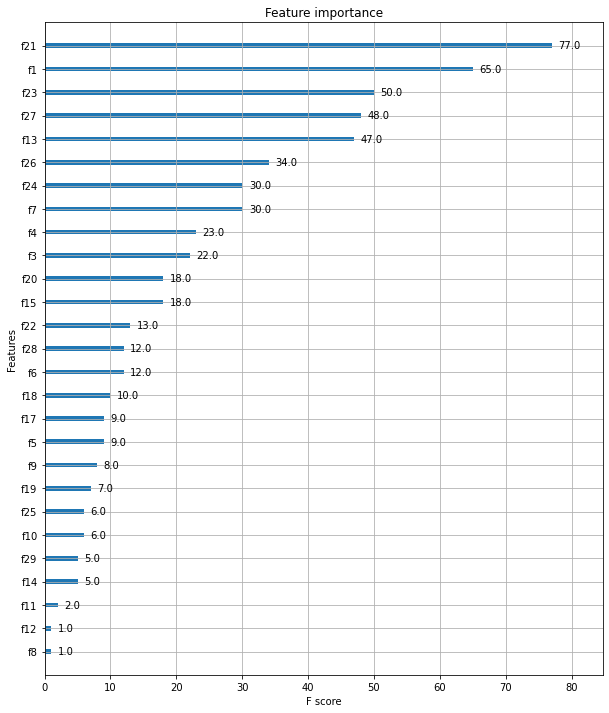

In [8]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax) # 중요도를 그림으로 표시

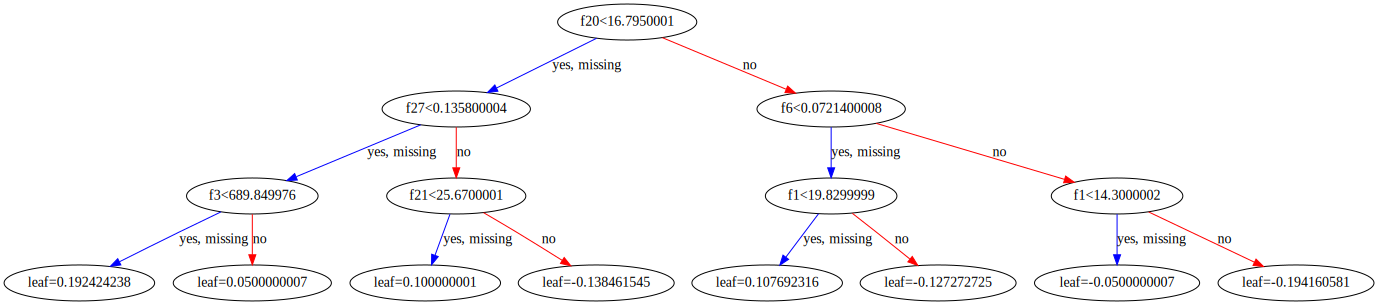

In [9]:
dot_data = xgb.to_graphviz(xgb_model)
# graph = graphviz.Source(dot_data)
# graph
dot_data

## XGBClassifier

### 붓꽃 데이터

In [10]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    test_size=0.2, random_state=123)

In [11]:
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, 
                     use_label_encoder=False, eval_metric='mlogloss')
# XGBClssifier will be depreciated. add argument "use_label_encoder=False" and "eval_metric='mlogloss"
xgbc.fit(X_train, y_train)
preds = xgbc.predict(X_test)
preds_proba = xgbc.predict_proba(X_test)[:, 1]

In [12]:
cross_val = cross_validate(estimator=xgbc,
                          X=iris.data, y=iris.target,
                          cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.2742142200469971 (+/- 0.009634713407139657)
avg score time: 0.0049670696258544925 (+/- 0.0025390912911368575)
avg test score: 0.96 (+/- 0.024944382578492935)


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

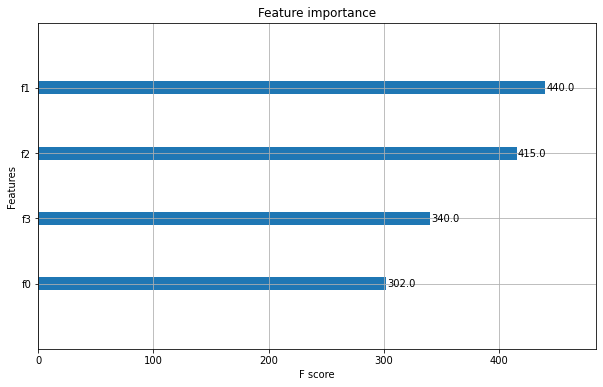

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_importance(xgbc, ax=ax)

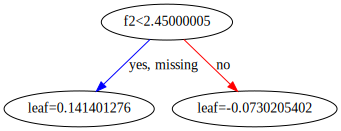

In [14]:
dot_data = xgb.to_graphviz(xgbc)
dot_data

### 와인 데이터

In [15]:
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, 
                                                    test_size=0.2, random_state=123)

In [16]:
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3,
                    use_label_encoder=False, eval_metric='mlogloss')

xgbc.fit(X_train,y_train)
preds = xgbc.predict(X_test)

In [17]:
cross_val = cross_validate(estimator=xgbc,
                           X=wine.data, y=wine.target,
                           cv=5)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.26192288398742675 (+/- 0.008990898408756684)
avg score time: 0.004306364059448242 (+/- 0.002867931407108146)
avg test score: 0.9609523809523809 (+/- 0.028267341226138717)


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

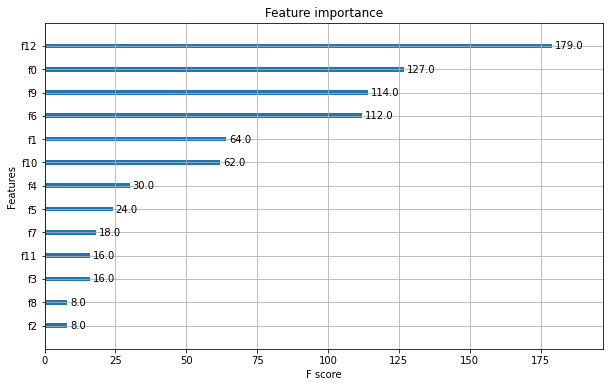

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
plot_importance(xgbc, ax=ax)

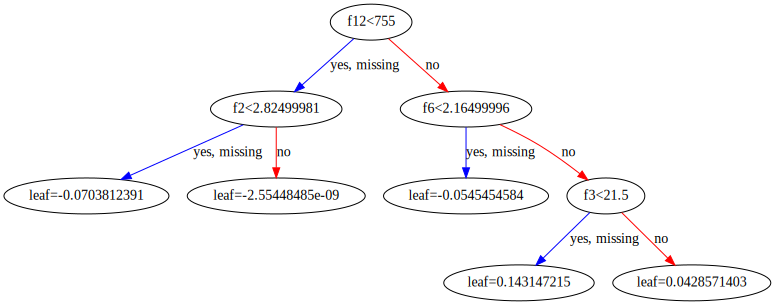

In [19]:
dot_data = xgb.to_graphviz(xgbc)
dot_data

### 유방암 데이터

In [20]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2, random_state=123)

In [21]:
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, 
                    use_label_encoder=False, eval_metric='mlogloss')
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [22]:
cross_val = cross_validate(estimator=xgbc,
                          X=cancer.data, y=cancer.target,
                          cv=5)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.2537731170654297 (+/- 0.04404607173502832)
avg score time: 0.0027925968170166016 (+/- 0.0003989935882917003)
avg test score: 0.9736376339077782 (+/- 0.009609619188189153)


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

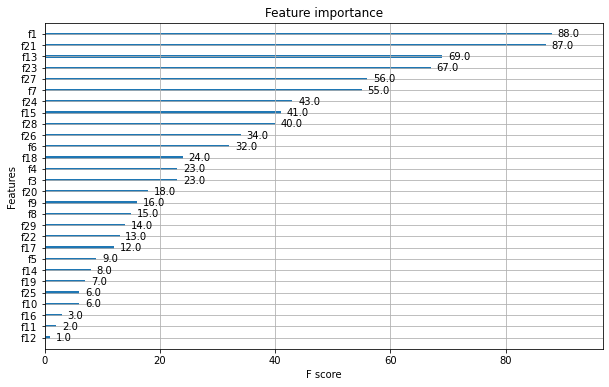

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
plot_importance(xgbc, ax=ax)

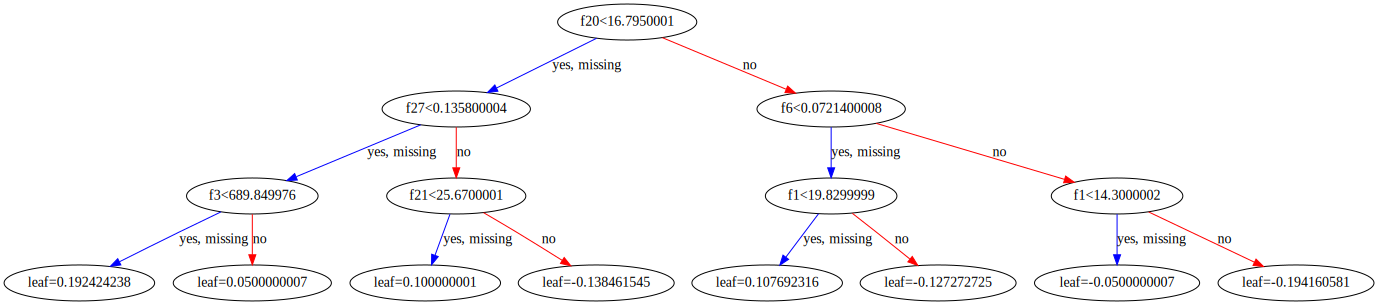

In [24]:
dot_data = xgb.to_graphviz(xgbc)
dot_data

## XGBRegressor

### 보스턴 데이터

In [25]:
X_train, X_test, y_train, t_test = None, None, None, None

In [26]:
boston = load_boston()
X_train, X_test, y_train, t_test = train_test_split(boston.data, boston.target,
                                                   test_size=0.2, random_state=123)

In [27]:
xgbr = XGBRegressor(n_estimators=400, learning_rate=0.1, max_depth=3, objective='reg:squarederror',
                    use_label_encoder=False, eval_metric='mlogloss')

xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=400, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             use_label_encoder=False, validate_parameters=1, verbosity=None)

In [28]:
cross_val = cross_validate(estimator=xgbr,
                          X=boston.data, y=boston.target,
                          cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.20924019813537598 (+/- 0.014851918053702113)
avg score time: 0.0025930404663085938 (+/- 0.0004886167368371107)
avg test score: 0.6884390736705599 (+/- 0.1649974770303876)


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

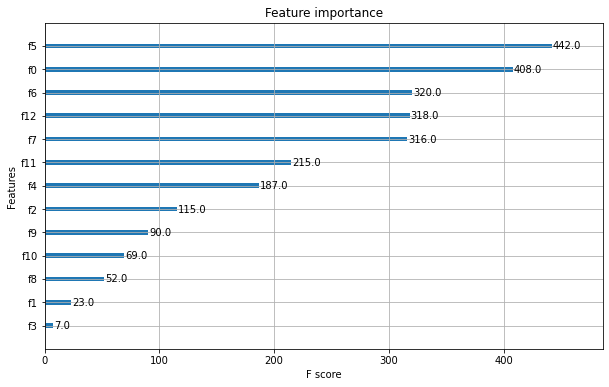

In [29]:
fig, ax = plt.subplots(figsize=(10,6))
plot_importance(xgbr, ax=ax)

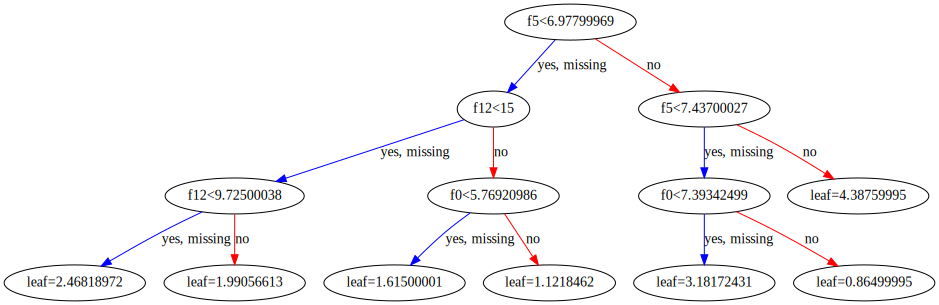

In [30]:
dot_data = xgb.to_graphviz(xgbr)
dot_data

### 당뇨병 데이터

In [31]:
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, 
                                                    test_size=0.2, random_state=123)

In [32]:
xgbr = XGBRegressor(n_estimators=400, learning_rate=0.1, max_depth=5, objective='reg:squarederror',
                   )
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=400, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [33]:
cross_val = cross_validate(estimator=xgbr,
                          X=diabetes.data, y=diabetes.target,
                          cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.2663876056671143 (+/- 0.01019989361024067)
avg score time: 0.0032929420471191407 (+/- 0.000399912058743332)
avg test score: 0.3175350069142853 (+/- 0.064688387960994)


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

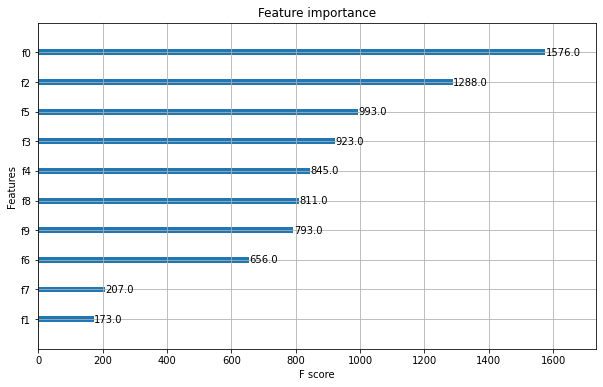

In [34]:
fig, ax = plt.subplots(figsize=(10,6))
plot_importance(xgbr, ax=ax)

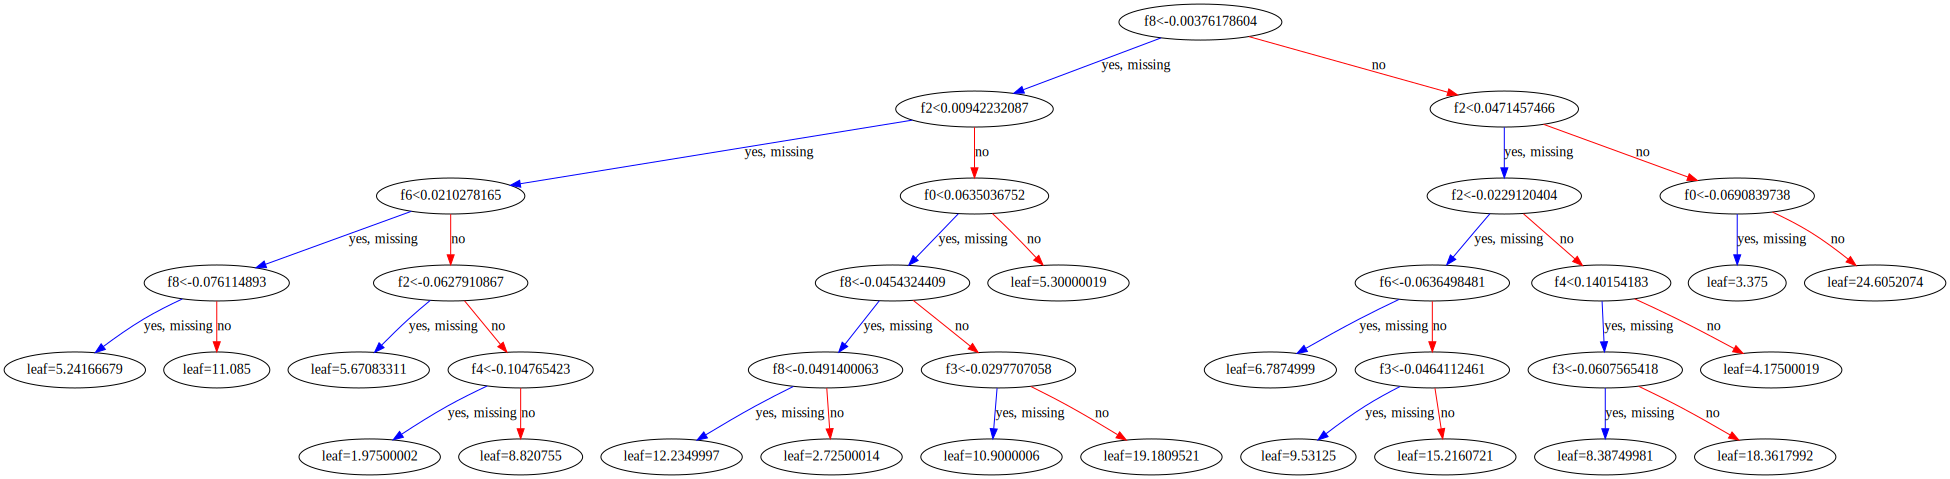

In [35]:
dot_data = xgb.to_graphviz(xgbr)
dot_data

# LightGBM

* 빠른 학습과 예측 시간
* 더 적은 메모리 사용
* 범주형 특징의 자동 변환과 최적 분할
* 작은 데이터 세트에 사용하는 것은 비추천. 
  -- 행수 제한은 없지만 10,000 이상의 데이터에 사용하는 것을 권유
* overfitting에 민감, 적은 데이터에 대해서 과적합하기 쉬움

In [36]:
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import early_stopping, log_evaluation
from lightgbm import plot_importance, plot_metric, plot_tree
# XGB의 plot_importance와 틀리니 다시 import 하고 사용해야 함.

## LGBMClassifier

### 붓꽃 데이터

In [37]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    test_size=0.2, random_state=123)

In [38]:
lgbmc = LGBMClassifier(n_estimators=400)
evals = [(X_test, y_test)]
# lgbmc.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss',
#           eval_set=evals, verbose=1) # 더 이상 early_stopping_rounds, verbose=1  제공되지 않음. 
#                                      # 아래로 callbacks로 대체
lgbmc.fit(X_train, y_train, 
          callbacks = [early_stopping(stopping_rounds=100, first_metric_only=False),
                      log_evaluation(10)], # <= 삭제하면 == verbose=0, 10단위로 리스트
          eval_metric='logloss', eval_set=evals)  
preds = lgbmc.predict(X_test)

Training until validation scores don't improve for 100 rounds
[10]	valid_0's multi_logloss: 0.333919
[20]	valid_0's multi_logloss: 0.168245
[30]	valid_0's multi_logloss: 0.124975
[40]	valid_0's multi_logloss: 0.114953
[50]	valid_0's multi_logloss: 0.123394
[60]	valid_0's multi_logloss: 0.142928
[70]	valid_0's multi_logloss: 0.166269
[80]	valid_0's multi_logloss: 0.199459
[90]	valid_0's multi_logloss: 0.23464
[100]	valid_0's multi_logloss: 0.269535
[110]	valid_0's multi_logloss: 0.306206
[120]	valid_0's multi_logloss: 0.337212
[130]	valid_0's multi_logloss: 0.35978
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.113318


In [39]:
cross_val = cross_validate(estimator=lgbmc,
                          X=iris.data, y=iris.target,
                          cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.05183830261230469 (+/- 0.005318602639100116)
avg score time: 0.00079803466796875 (+/- 0.00039901736247607795)
avg test score: 0.9600000000000002 (+/- 0.04898979485566355)


<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='multi_logloss'>

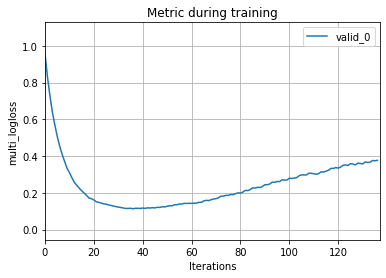

In [40]:
plot_metric(lgbmc)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

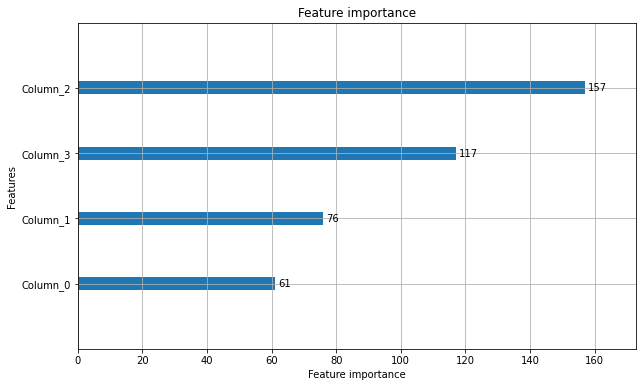

In [41]:
plot_importance(lgbmc, figsize=(10,6) )

<AxesSubplot:>

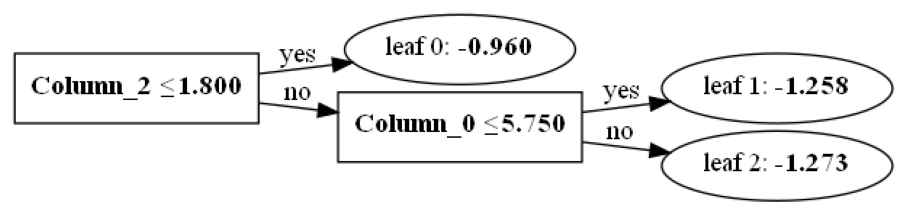

In [42]:
plot_tree(lgbmc, figsize=(16,10))

### 와인 데이터

In [43]:
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, 
                                                    test_size=0.2, random_state=123)

In [44]:
lgbmc = LGBMClassifier(n_estimators=400)
evals = [(X_test, y_test)]
lgbmc.fit(X_train, y_train, 
          callbacks = [early_stopping(stopping_rounds=100, first_metric_only=False),
                      log_evaluation(10)], # <= 삭제하면 == verbose=0, 10단위로 리스트
          eval_metric='logloss', eval_set=evals)  
preds = lgbmc.predict(X_test)

Training until validation scores don't improve for 100 rounds
[10]	valid_0's multi_logloss: 0.418941
[20]	valid_0's multi_logloss: 0.188324
[30]	valid_0's multi_logloss: 0.0958248
[40]	valid_0's multi_logloss: 0.0558417
[50]	valid_0's multi_logloss: 0.0295988
[60]	valid_0's multi_logloss: 0.0195643
[70]	valid_0's multi_logloss: 0.0150005
[80]	valid_0's multi_logloss: 0.0117474
[90]	valid_0's multi_logloss: 0.0100967
[100]	valid_0's multi_logloss: 0.00741646
[110]	valid_0's multi_logloss: 0.00716007
[120]	valid_0's multi_logloss: 0.00583077
[130]	valid_0's multi_logloss: 0.00529906
[140]	valid_0's multi_logloss: 0.00579675
[150]	valid_0's multi_logloss: 0.00563791
[160]	valid_0's multi_logloss: 0.00519184
[170]	valid_0's multi_logloss: 0.00490918
[180]	valid_0's multi_logloss: 0.00450071
[190]	valid_0's multi_logloss: 0.00410374
[200]	valid_0's multi_logloss: 0.00369231
[210]	valid_0's multi_logloss: 0.00369164
[220]	valid_0's multi_logloss: 0.00353156
[230]	valid_0's multi_logloss: 0.0

In [45]:
cross_val = cross_validate(estimator=lgbmc,
                          X=wine.data, y=wine.target,
                          cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.04150581359863281 (+/- 0.0047685680730389845)
avg score time: 0.0003989219665527344 (+/- 0.0004885776558898482)
avg test score: 0.9776190476190475 (+/- 0.01119469694127331)


<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='multi_logloss'>

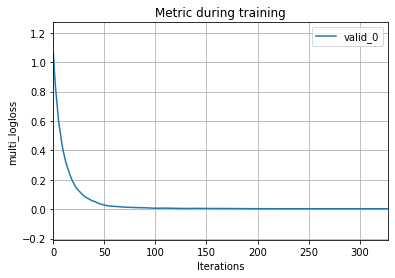

In [46]:
plot_metric(lgbmc)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

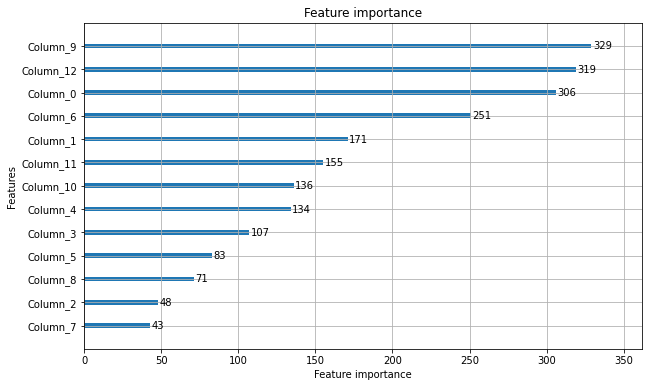

In [47]:
plot_importance(lgbmc, figsize=(10,6) )

<AxesSubplot:>

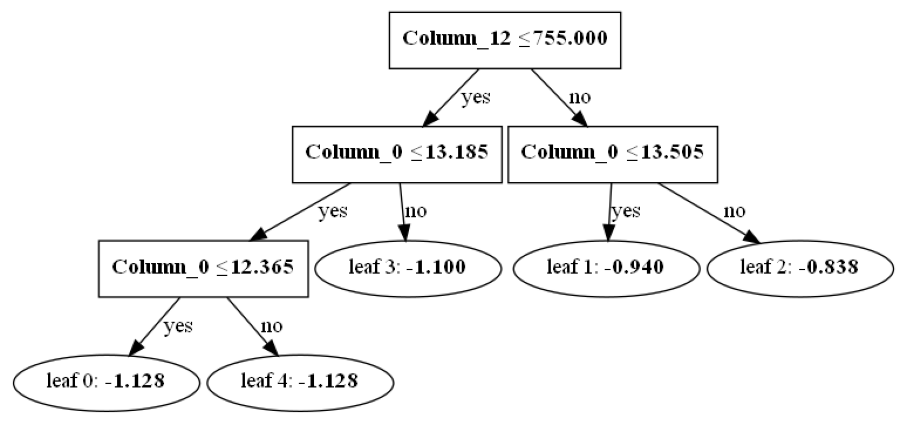

In [48]:
plot_tree(lgbmc, orientation='vertical', figsize=(16,8)) # default: 'horizontal'

### 유방암 데이터

In [49]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2, random_state=123)

In [50]:
lgbmc = LGBMClassifier(n_estimators=400)
evals = [(X_test, y_test)]
# lgbmc.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss',
#           eval_set=evals, verbose=1) # 더 이상 early_stopping_rounds, verbose=1  제공되지 않음. 
#                                      # 아래로 callbacks로 대체
lgbmc.fit(X_train, y_train, 
          callbacks = [early_stopping(stopping_rounds=100, first_metric_only=False),
                      log_evaluation(10)], # <= 삭제하면 == verbose=0, 10단위로 리스트
          eval_metric='logloss', eval_set=evals)  
preds = lgbmc.predict(X_test)

Training until validation scores don't improve for 100 rounds
[10]	valid_0's binary_logloss: 0.259487
[20]	valid_0's binary_logloss: 0.146169
[30]	valid_0's binary_logloss: 0.099749
[40]	valid_0's binary_logloss: 0.0882751
[50]	valid_0's binary_logloss: 0.0903252
[60]	valid_0's binary_logloss: 0.0944477
[70]	valid_0's binary_logloss: 0.0917539
[80]	valid_0's binary_logloss: 0.101371
[90]	valid_0's binary_logloss: 0.109715
[100]	valid_0's binary_logloss: 0.115317
[110]	valid_0's binary_logloss: 0.123587
[120]	valid_0's binary_logloss: 0.128557
[130]	valid_0's binary_logloss: 0.140619
[140]	valid_0's binary_logloss: 0.150012
Early stopping, best iteration is:
[43]	valid_0's binary_logloss: 0.0865393


In [51]:
cross_val = cross_validate(estimator=lgbmc,
                          X=cancer.data, y=cancer.target,
                          cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.055451250076293944 (+/- 0.002569971350704532)
avg score time: 0.0007978439331054688 (+/- 0.0003989221660422917)
avg test score: 0.9736531594472908 (+/- 0.015674460437800138)


<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

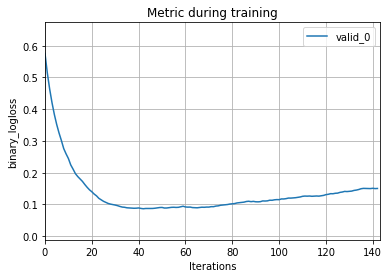

In [52]:
plot_metric(lgbmc)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

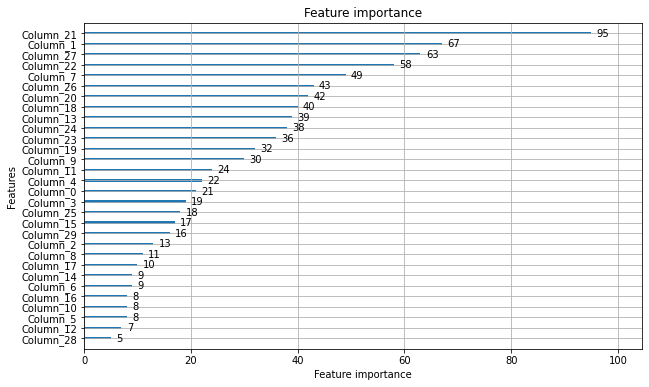

In [53]:
plot_importance(lgbmc, figsize=(10,6) )

<AxesSubplot:>

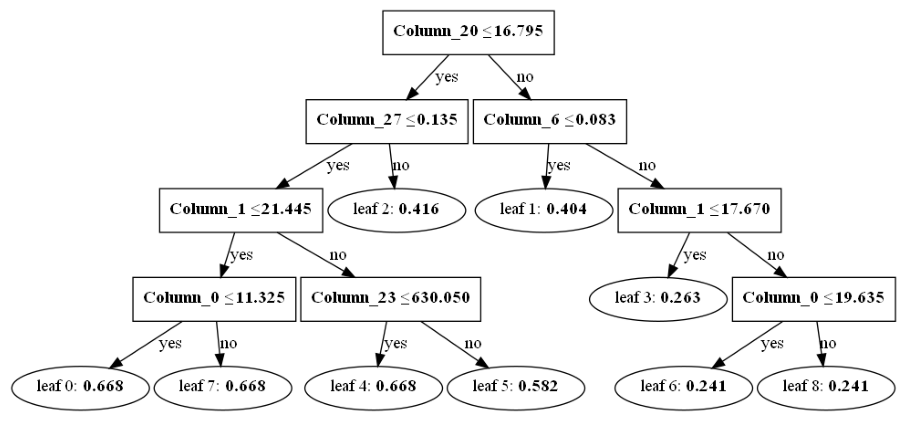

In [54]:
plot_tree(lgbmc, orientation='vertical', figsize=(16,8)) # default: 'horizontal'

## LGBMRegressor

### 보스턴 데이터

In [55]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, 
                                                    test_size=0.2, random_state=123)

In [56]:
lgbmr = LGBMRegressor(n_estimators=400)
evals = [(X_test, y_test)]
lgbmr.fit(X_train, y_train, 
          callbacks = [early_stopping(stopping_rounds=100, first_metric_only=False),
                      log_evaluation(10)], # <= 삭제하면 == verbose=0, 10단위로 리스트
          eval_metric='logloss', eval_set=evals)  
preds = lgbmr.predict(X_test)

Training until validation scores don't improve for 100 rounds
[10]	valid_0's l2: 30.082
[20]	valid_0's l2: 24.2858
[30]	valid_0's l2: 22.8943
[40]	valid_0's l2: 22.2952
[50]	valid_0's l2: 22.0159
[60]	valid_0's l2: 21.7386
[70]	valid_0's l2: 21.5839
[80]	valid_0's l2: 21.5436
[90]	valid_0's l2: 21.344
[100]	valid_0's l2: 21.3165
[110]	valid_0's l2: 21.1094
[120]	valid_0's l2: 21.0765
[130]	valid_0's l2: 20.8805
[140]	valid_0's l2: 20.7466
[150]	valid_0's l2: 20.7688
[160]	valid_0's l2: 20.629
[170]	valid_0's l2: 20.6265
[180]	valid_0's l2: 20.736
[190]	valid_0's l2: 20.6867
[200]	valid_0's l2: 20.7257
[210]	valid_0's l2: 20.7634
[220]	valid_0's l2: 20.7873
[230]	valid_0's l2: 20.7138
[240]	valid_0's l2: 20.7222
[250]	valid_0's l2: 20.6835
Early stopping, best iteration is:
[158]	valid_0's l2: 20.5975


In [57]:
cross_val = cross_validate(estimator=lgbmr,
                          X=boston.data, y=boston.target,
                          cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0604947566986084 (+/- 0.0038235551381376525)
avg score time: 0.0009974956512451172 (+/- 2.78041453115716e-07)
avg test score: 0.5692468252571979 (+/- 0.2956636613238221)


<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='l2'>

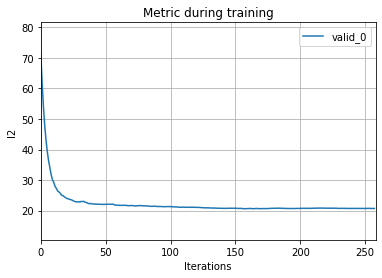

In [58]:
plot_metric(lgbmr)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

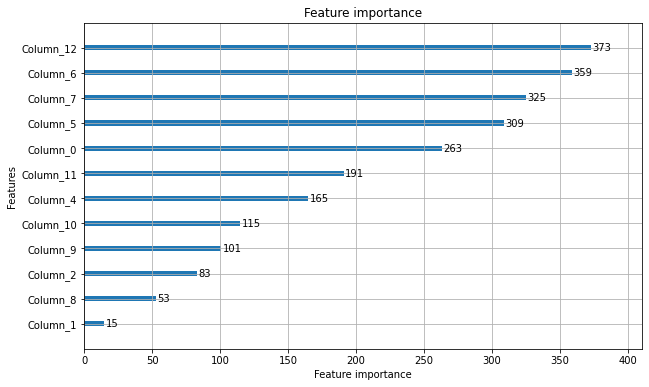

In [59]:
plot_importance(lgbmr, figsize=(10,6) )

<AxesSubplot:>

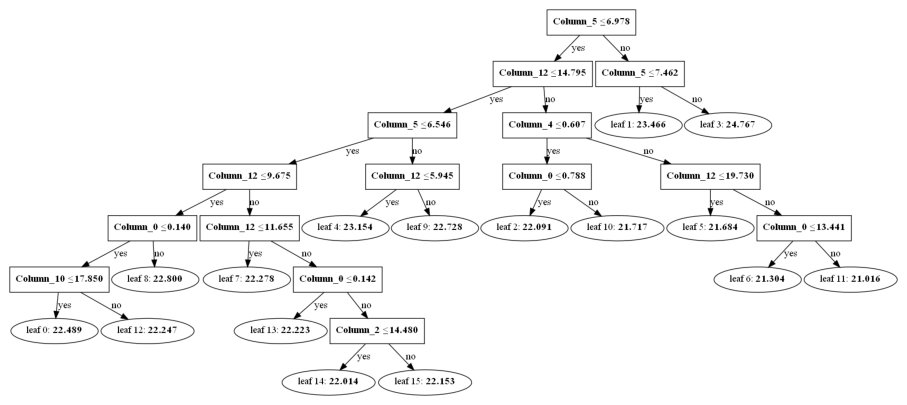

In [60]:
plot_tree(lgbmr, orientation='vertical', figsize=(16,8)) # default: 'horizontal'

### 당뇨병 데이터

In [61]:
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, 
                                                    test_size=0.2, random_state=123)

In [62]:
lgbmr = LGBMRegressor(n_estimators=400)
evals = [(X_test, y_test)]
lgbmr.fit(X=X_train, y=y_train,
         callbacks = [early_stopping(stopping_rounds=100, first_metric_only=False),
                      log_evaluation(10)],
         eval_metric='logloss',  eval_set=evals
         )

Training until validation scores don't improve for 100 rounds
[10]	valid_0's l2: 3291.33
[20]	valid_0's l2: 2745.25
[30]	valid_0's l2: 2615.14
[40]	valid_0's l2: 2616.08
[50]	valid_0's l2: 2665.95
[60]	valid_0's l2: 2663.94
[70]	valid_0's l2: 2722.68
[80]	valid_0's l2: 2805.5
[90]	valid_0's l2: 2953.52
[100]	valid_0's l2: 2959.59
[110]	valid_0's l2: 2986.16
[120]	valid_0's l2: 3000.24
[130]	valid_0's l2: 3031.45
Early stopping, best iteration is:
[33]	valid_0's l2: 2555.64


LGBMRegressor(n_estimators=400)

In [63]:
cross_val = cross_validate(estimator=lgbmr,
                          X=diabetes.data, y=diabetes.target,
                          cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.04677615165710449 (+/- 0.0016191711159039312)
avg score time: 0.0007977962493896484 (+/- 0.0003988983918842846)
avg test score: 0.30867643947179507 (+/- 0.07010708786960605)


<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='l2'>

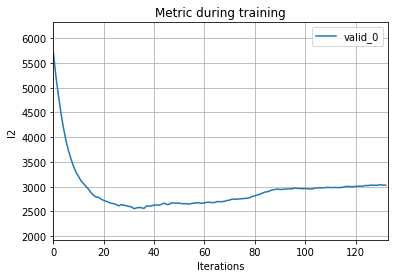

In [64]:
plot_metric(lgbmr)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

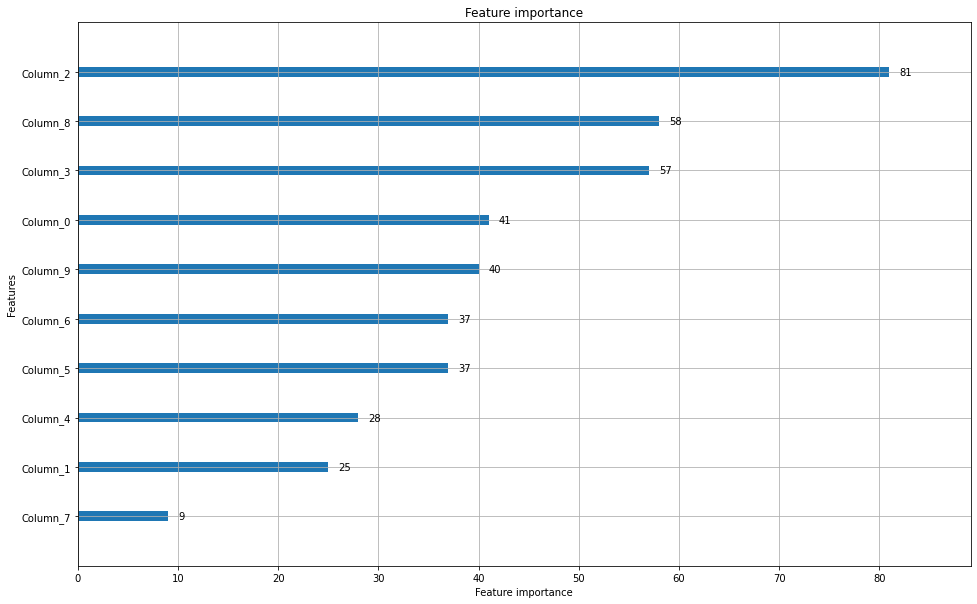

In [65]:
plot_importance(lgbmr, figsize=(16,10))

<AxesSubplot:>

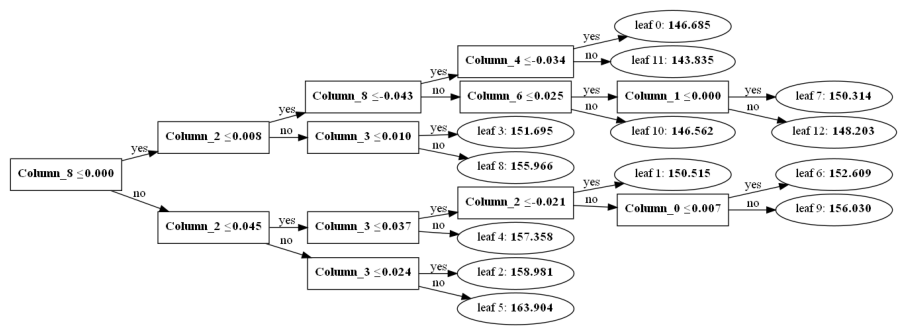

In [66]:
plot_tree(lgbmr, orientation='horizontal', figsize=(16,10))